## Dataset 
- [歡summary-mannual-inspection-0709-2018 -template 3 拷貝.csv](data/small-movie/歡summary-mannual-inspection-0709-2018 -template 3 拷貝.csv)
- [small-movie](data/small-movie) 
- [simulation-mitochondrial-partition-n168-large-mitochondria-ratio](data/simulation-mitochondrial-partition-n168-large-mitochondria-ratio.xlsx)

## Load Small Movies

### Load File Names

In [2]:
import os 
import pandas as pd
import warnings

In [3]:
# Setting 
img_folder = 'data/small-movie'
movie_format = '.tif'
dataset = pd.read_csv(os.path.join(img_folder,'歡summary-mannual-inspection-0709-2018 -template 3 拷貝.csv'))
Fullfilenames = []
for i, filename in enumerate(dataset['FileName']):
    if '.' not in filename:
        Fullfilenames.append(filename + movie_format)
    else:
        Fullfilenames.append(filename)
dataset = dataset.dropna(axis=1, how='all')
dataset['FileName'] = Fullfilenames
dataset = dataset.set_index('FileName')

In [4]:
# The small-movie dataset
print('{} movies'.format(len(dataset.index)))
dataset.head()

146 movies


,concentration at division furrow,stretching,thinning before fission,spindle length (pixel),start anaphase,start concentration,start cytokinesis,start stretching,complete division,daughter nuclear area 1,...,daughter nuclear intensity variance,daughter mitochondrial area 1,daughter mitochonrial area 2,daughter mitochondrial intensity 1,daughter mitochondrial intensity 2,daughter mitochondrial area variance,daughter mitochondrial intensity variance,notes,coverage of duration,total recorded frame number
FileName,,,,,,,,,,,,,,,,,,,,,
11292017_c1_decon-normal.tif,y,y,y,506,na,0,53,106,256,na,...,#VALUE!,139869,149673,7777997,10456542,0.033860373,0.146894034,NaN,cytokinesis-division,527.0
11292017_c2_decon-normal.tif,y,y,y,463,na,0,59,120,242,na,...,#VALUE!,205825,227026,12144681,13734735,0.048979903,0.061440876,NaN,cytokinesis-division,343.0
11292017_c3_decon-asymmetric.tif,y,y,n,518,na,0,236,464,555,na,...,#VALUE!,180672,206337,8284594,14718819,0.066316287,0.279707407,fragmented and become tubular,anaphase-division,646.0
11292017_c4_decon-asymmetric-get extrat-mitochondria-from-other-cells.tif,y,y,n,429,na,493,661,820,1106,na,...,#VALUE!,188455,174122,11731378,7536621,0.039530913,0.217705897,NaN,anaphase-division,1111.0
11292017_c5_decon-not-divide.tif,n,n,n,na,na,na,na,na,na,na,...,#VALUE!,na,na,na,na,#VALUE!,#VALUE!,fragmented and moving slowly,metaphase-concentration,771.0


### Verify the movies are accessible

In [5]:
def find_missing_movie(img_folder, movie_format, filenames):
    movie_notfound = [] # list of inaccessible movies
    for i, filename in enumerate(filenames):

        if '.' not in filename: # add format code
            filename_format = filename + movie_format
        else:
            filename_format = filename

        if filename_format not in os.listdir(img_folder):
            print('\"{}\" not found'.format(filename_format))
            movie_notfound.append(filename.split('.')[0])
        else:
            pass

    print('{}/{} movies not found'.format(len(movie_notfound), len(filenames)))
    return movie_notfound
def add_formats(filenames_with_out_format, f):
    names = []
    for n in filenames_with_out_format:
        names.append(n + f)
    return names

In [6]:
movie_notfound = find_missing_movie(img_folder, movie_format, dataset.index)

"12212017_decon_c5-no-divide-incomplete.tif" not found
"12212017_decon_c7-incomplete.tif" not found
"12212017_dual_decon_c10-start late cyctokinesis.tif" not found
"12212017_dual_decon_c1-incomplete.tif" not found
"12212017_dual_decon_c6-very-good.tif" not found
"12222017_dual_decon_c10-incomplete-record.tif" not found
"12222017_dual_decon_c6-incompleted.tif" not found
"12222017_dual_decon_c7-incomplete-record.tif" not found
"12222017_dual_decon_c8-incomplete-record.tif" not found
"12222017_dual_decon_c9-incomplete-record.tif" not found
"12272017_dual_decon_c11-no-divide-incomplete-record.tif" not found
"12272017_dual_decon_c3-incomplete-record.tif" not found
"12272017_dual_decon_c6-incomplete-record.tif" not found
"12272017_dual_decon_c9_no div-incomplete-record.tif" not found
"12282017_dual_decon_c10-incomplete.tif" not found
"12282017_dual_decon_c11-incomplete.tif" not found
"12282017_dual_decon_c12-incomplete.tif" not found
"12282017_dual_decon_c13-abnormal-overlapped.tif" not foun

### Find Unmatch Filenames
The predicted combinations of TIFF filenames and EXCEL filenames are shown below.
The prediction, for example "12292017_dual_decon_c8.tif" in [csv]("data/small-movie/歡summary-mannual-inspection-0709-2018 -template 3 拷貝.csv"), is based on the features:

|Filename|Time|C|Dual|
|---|---|---|---|
|12292017_dual_decon_c8.tif|12292017|8|True|

And the matched one in TIFF files is

|Filename|Time|C|Dual|
|---|---|---|---|
|12292017_dual_decon_c8-normal-short-spindle.tif|12292017|8|True|

In [7]:
def namef(filename):
    return [time_sep(filename), find_c(filename), check_dual(filename)]

def time_sep(filename):
    for year in range(2010, 2020):
        y = str(year)
        if filename.find(y) != -1:
            return filename[filename.find(y)-4: filename.find(y)] + y
    return None

def check_dual(filename):
    if 'dual' in filename:
        return True
    else:
        return False

def find_c(filename):
    frags = filename.split('c')
    for frag in frags:
        s = []
        for i in frag:
            if i.isdigit():
                s.append(int(i))
            else:
                break
        r = 0
        for i, number in enumerate(reversed(s)):
            r += (10**i) * (number)
        if r < 100 and r > 0:
            break
    return r

tifs = []
for i in os.listdir(img_folder):
    tifs.append(i)
    
tiff_excel_name_pairs = [] # list of (TIFF, EXCEL Name) pairs

for test in movie_notfound:
    for i in tifs:
        if namef(i) == namef(test):
            print('| {} | {} |'.format(i.split('.')[0], test))
            tiff_excel_name_pairs.append((i, test))

| 12212017_decon_c5 | 12212017_decon_c5-no-divide-incomplete |
| 12212017_decon_c7 | 12212017_decon_c7-incomplete |
| 12212017_dual_decon_c10 | 12212017_dual_decon_c10-start late cyctokinesis |
| 12212017_dual_decon_c1 | 12212017_dual_decon_c1-incomplete |
| 12212017_dual_decon_c6 | 12212017_dual_decon_c6-very-good |
| 12222017_dual_decon_c10 | 12222017_dual_decon_c10-incomplete-record |
| 12222017_dual_decon_c6 | 12222017_dual_decon_c6-incompleted |
| 12222017_dual_decon_c7 | 12222017_dual_decon_c7-incomplete-record |
| 12222017_dual_decon_c8 | 12222017_dual_decon_c8-incomplete-record |
| 12222017_dual_decon_c9 | 12222017_dual_decon_c9-incomplete-record |
| 12272017_dual_decon_c11-no-divide-incomplete | 12272017_dual_decon_c11-no-divide-incomplete-record |
| 12272017_dual_decon_c3 | 12272017_dual_decon_c3-incomplete-record |
| 12272017_dual_decon_c6 | 12272017_dual_decon_c6-incomplete-record |
| 12272017_dual_decon_c9_no div | 12272017_dual_decon_c9_no div-incomplete-record |
| 122820

|TIFF FILE NAME|EXCEL FILE NAME|
|---|---|
| 12212017_decon_c5 | 12212017_decon_c5-no-divide-incomplete |
| 12212017_decon_c7 | 12212017_decon_c7-incomplete |
| 12212017_dual_decon_c10 | 12212017_dual_decon_c10-start late cyctokinesis |
| 12212017_dual_decon_c1 | 12212017_dual_decon_c1-incomplete |
| 12212017_dual_decon_c6 | 12212017_dual_decon_c6-very-good |
| 12222017_dual_decon_c10 | 12222017_dual_decon_c10-incomplete-record |
| 12222017_dual_decon_c6 | 12222017_dual_decon_c6-incompleted |
| 12222017_dual_decon_c7 | 12222017_dual_decon_c7-incomplete-record |
| 12222017_dual_decon_c8 | 12222017_dual_decon_c8-incomplete-record |
| 12222017_dual_decon_c9 | 12222017_dual_decon_c9-incomplete-record |
| 12272017_dual_decon_c11-no-divide-incomplete | 12272017_dual_decon_c11-no-divide-incomplete-record |
| 12272017_dual_decon_c3 | 12272017_dual_decon_c3-incomplete-record |
| 12272017_dual_decon_c6 | 12272017_dual_decon_c6-incomplete-record |
| 12272017_dual_decon_c9_no div | 12272017_dual_decon_c9_no div-incomplete-record |
| 12282017_dual_decon_c10-normal | 12282017_dual_decon_c10-incomplete |
| 12282017_dual_decon_c11-normal | 12282017_dual_decon_c11-incomplete |
| 12282017_dual_decon_c12-normal-incomplete-record | 12282017_dual_decon_c12-incomplete |
| 12282017_dual_decon_c13-abnormal | 12282017_dual_decon_c13-abnormal-overlapped |
| 12282017_dual_decon_c15-normal | 12282017_dual_decon_c15 |
| 12282017_dual_decon_c16_dead | 12282017_dual_decon_c16_dead-incomplete-record |
| 12282017_dual_decon_c17_dead | 12282017_dual_decon_c17_dead-incomplete-record |
| 12282017_dual_decon_c1-record-after-mitosis | 12282017_dual_decon_c1-record-after-mitosis-incomplete-record |
| 12282017_dual_decon_c22_dead | 12282017_dual_decon_c22_dead-incomplete-record |
| 12282017_dual_decon_c27_dead | 12282017_dual_decon_c27_dead-incomplete-record |
| 12282017_dual_decon_c28_no div | 12282017_dual_decon_c28_no div-abnormal-incomplete-record |
| 12282017_dual_decon_c29_no div | 12282017_dual_decon_c29_no div-incomplete-record |
| 12282017_dual_decon_c7-normal-incomplete-record | 12282017_dual_decon_c7 |
| 12282017_dual_decon_c8-normal-incomplete-record | 12282017_dual_decon_c8 |
| 12292017_dual_decon_c10-in-complete-record | 12292017_dual_decon_c10 |
| 12292017_dual_decon_c13 | 12292017_dual_decon_c13-overlapped |
| 12292017_dual_decon_c16_no div | 12292017_dual_decon_c16_no div-incomplete-record |
| 12292017_dual_decon_c19 | 12292017_dual_decon_c19-overlapped |
| 12292017_dual_decon_c35_n | 12292017_dual_decon_c35_n-incomplete-record |
| 12292017_dual_decon_c8-normal-short-spindle | 12292017_dual_decon_c8 |
| c10_decon_11292017-mito-only-normal | c10_decon_11292017-mito-only-normal (uneven illumination) |
| 11292017_c4_decon-asymmetric-get extrat-mitochondria-from-other-cells | c4-left_decon_11292017-normal |
| c4_decon_11292017-normal | c4-left_decon_11292017-normal |
| 11292017_c4_decon-asymmetric-get extrat-mitochondria-from-other-cells | c4-right_decon_11292017-normal |
| c4_decon_11292017-normal | c4-right_decon_11292017-normal |
| c5_decon_11232017 | c5_decon_11232017-normal |
| c6_decon_11242017-not-divide | c6_11242017 |
| 11292017_c6_decon-normal | c6_11292017-normal |
| c6_decon_11292017-normal | c6_11292017-normal |
| 11292017_c7_decon-normal | c7_11292017-normal |
| c7_decon_11292017-no-mitosis | c7_11292017-normal |
| c8_decon_11292017-mitochondria-only-normal | c8_11292017-normal-mito-only |

## Revised CSV Filenames to Match TIFF Videos

In [8]:
datasetR = dataset.copy() # Revised dataset
datasetR['FileName_TIFF'] = datasetR.index # Create nicknames
for aka, excel_name in tiff_excel_name_pairs:
    if movie_format not in excel_name:
        excel_name = excel_name + movie_format
    datasetR.at[datasetR.index == excel_name, 'FileName_TIFF'] = aka 
datasetR = datasetR.reset_index()
datasetR = datasetR.set_index('FileName_TIFF')

In [9]:
datasetR.head()

,FileName,concentration at division furrow,stretching,thinning before fission,spindle length (pixel),start anaphase,start concentration,start cytokinesis,start stretching,complete division,...,daughter nuclear intensity variance,daughter mitochondrial area 1,daughter mitochonrial area 2,daughter mitochondrial intensity 1,daughter mitochondrial intensity 2,daughter mitochondrial area variance,daughter mitochondrial intensity variance,notes,coverage of duration,total recorded frame number
FileName_TIFF,,,,,,,,,,,,,,,,,,,,,
11292017_c1_decon-normal.tif,11292017_c1_decon-normal.tif,y,y,y,506,na,0,53,106,256,...,#VALUE!,139869,149673,7777997,10456542,0.033860373,0.146894034,NaN,cytokinesis-division,527.0
11292017_c2_decon-normal.tif,11292017_c2_decon-normal.tif,y,y,y,463,na,0,59,120,242,...,#VALUE!,205825,227026,12144681,13734735,0.048979903,0.061440876,NaN,cytokinesis-division,343.0
11292017_c3_decon-asymmetric.tif,11292017_c3_decon-asymmetric.tif,y,y,n,518,na,0,236,464,555,...,#VALUE!,180672,206337,8284594,14718819,0.066316287,0.279707407,fragmented and become tubular,anaphase-division,646.0
11292017_c4_decon-asymmetric-get extrat-mitochondria-from-other-cells.tif,11292017_c4_decon-asymmetric-get extrat-mitoch...,y,y,n,429,na,493,661,820,1106,...,#VALUE!,188455,174122,11731378,7536621,0.039530913,0.217705897,NaN,anaphase-division,1111.0
11292017_c5_decon-not-divide.tif,11292017_c5_decon-not-divide.tif,n,n,n,na,na,na,na,na,na,...,#VALUE!,na,na,na,na,#VALUE!,#VALUE!,fragmented and moving slowly,metaphase-concentration,771.0


### Find missing movie

In [10]:
missing_movie = find_missing_movie(img_folder, movie_format, datasetR.index)

"12292017decon_c1.tif" not found
"12292017decon_c2.tif" not found
"12292017decon_c3.tif" not found
"12292017decon_c4.tif" not found
"12292017decon_c5.tif" not found
"04222016_mito_cell1.tif" not found
6/146 movies not found


### Remove missing movies

In [11]:
datasetRF = datasetR.copy()
datasetRF = datasetRF.drop(add_formats(missing_movie, movie_format), axis = 0)
missing_movie2 = find_missing_movie(img_folder, movie_format, datasetRF.index)

0/140 movies not found


In [12]:
datasetRF.head()

,FileName,concentration at division furrow,stretching,thinning before fission,spindle length (pixel),start anaphase,start concentration,start cytokinesis,start stretching,complete division,...,daughter nuclear intensity variance,daughter mitochondrial area 1,daughter mitochonrial area 2,daughter mitochondrial intensity 1,daughter mitochondrial intensity 2,daughter mitochondrial area variance,daughter mitochondrial intensity variance,notes,coverage of duration,total recorded frame number
FileName_TIFF,,,,,,,,,,,,,,,,,,,,,
11292017_c1_decon-normal.tif,11292017_c1_decon-normal.tif,y,y,y,506,na,0,53,106,256,...,#VALUE!,139869,149673,7777997,10456542,0.033860373,0.146894034,NaN,cytokinesis-division,527.0
11292017_c2_decon-normal.tif,11292017_c2_decon-normal.tif,y,y,y,463,na,0,59,120,242,...,#VALUE!,205825,227026,12144681,13734735,0.048979903,0.061440876,NaN,cytokinesis-division,343.0
11292017_c3_decon-asymmetric.tif,11292017_c3_decon-asymmetric.tif,y,y,n,518,na,0,236,464,555,...,#VALUE!,180672,206337,8284594,14718819,0.066316287,0.279707407,fragmented and become tubular,anaphase-division,646.0
11292017_c4_decon-asymmetric-get extrat-mitochondria-from-other-cells.tif,11292017_c4_decon-asymmetric-get extrat-mitoch...,y,y,n,429,na,493,661,820,1106,...,#VALUE!,188455,174122,11731378,7536621,0.039530913,0.217705897,NaN,anaphase-division,1111.0
11292017_c5_decon-not-divide.tif,11292017_c5_decon-not-divide.tif,n,n,n,na,na,na,na,na,na,...,#VALUE!,na,na,na,na,#VALUE!,#VALUE!,fragmented and moving slowly,metaphase-concentration,771.0


### Verify the frames are matched

In [13]:
from skimage import io

def path(img_folder, filename):
    return os.path.join(img_folder, filename)

match_f = []
unmatch_f = []
invalid = []


for filename, FrameNumber in zip(datasetRF.index , datasetRF['total recorded frame number']):
    try:
        img = io.imread(path(img_folder, filename))
        if img.shape[0] != int(FrameNumber):
            print('{} | {} | {}'.format(filename, img.shape[0], int(FrameNumber)))
            unmatch_f.append(filename)
        else:
            print('{} matched'.format(filename))
            match_f.append(filename)
        del img
    except:
        print('{} invalid'.format(filename))
        invalid.append(filename)


11292017_c1_decon-normal.tif matched
11292017_c2_decon-normal.tif matched
11292017_c3_decon-asymmetric.tif matched
11292017_c4_decon-asymmetric-get extrat-mitochondria-from-other-cells.tif matched
11292017_c5_decon-not-divide.tif matched
11292017_c6_decon-normal.tif matched
11292017_c7_decon-normal.tif matched
11302017_c1_dual_decon-asymmetric-partition.tif matched
11302017_c10_dual_decon-normal.tif matched
11302017_c3_dual_decon-normal.tif matched
11302017_c4_dual_decon-normal-run-out-off-field.tif matched
11302017_c5_dual_decon-normal-fragmented-mitochondria.tif | 1032 | 1130
11302017_c6_dual_decon-normal.tif matched
11302017_c7_dual_decon-normal.tif matched
11302017_c8_dual_decon-normal-short-few.tif matched
11302017_c9_dual_decon-normal-no-stretching.tif matched
12012017_c1_dual_decon-normal.tif matched
12012017_c10_dual_decon-incomplete-record.tif matched
12012017_c11_dual_decon-normal.tif matched
12012017_c12_dual_decon-normal.tif matched
12012017_c2_dual_decon-incomplete-record.

In [14]:
## Duplicate
from skimage import io

def path(img_folder, filename):
    return os.path.join(img_folder, filename)

match_f = []
unmatch_f = []
invalid = []

video = {
    'FileName': [],
    'Shape': [],
}

for filename, FrameNumber in zip(datasetRF.index , datasetRF['total recorded frame number']):
    try:
        img = io.imread(path(img_folder, filename))
        if img.shape[0] != int(FrameNumber):
            print('{} | {} | {}'.format(filename, img.shape[0], int(FrameNumber)))
            video['FileName'].append(filename)
            video['Shape'].append(img.shape)
        else:
            print('{} matched'.format(filename))
            video['FileName'].append(filename)
            video['Shape'].append(img.shape)
        del img
    except:
        print('{} invalid'.format(filename))
        video['FileName'].append(filename)
        video['Shape'].append(None)


11292017_c1_decon-normal.tif matched
11292017_c2_decon-normal.tif matched
11292017_c3_decon-asymmetric.tif matched
11292017_c4_decon-asymmetric-get extrat-mitochondria-from-other-cells.tif matched
11292017_c5_decon-not-divide.tif matched
11292017_c6_decon-normal.tif matched
11292017_c7_decon-normal.tif matched
11302017_c1_dual_decon-asymmetric-partition.tif matched
11302017_c10_dual_decon-normal.tif matched
11302017_c3_dual_decon-normal.tif matched
11302017_c4_dual_decon-normal-run-out-off-field.tif matched
11302017_c5_dual_decon-normal-fragmented-mitochondria.tif | 1032 | 1130
11302017_c6_dual_decon-normal.tif matched
11302017_c7_dual_decon-normal.tif matched
11302017_c8_dual_decon-normal-short-few.tif matched
11302017_c9_dual_decon-normal-no-stretching.tif matched
12012017_c1_dual_decon-normal.tif matched
12012017_c10_dual_decon-incomplete-record.tif matched
12012017_c11_dual_decon-normal.tif matched
12012017_c12_dual_decon-normal.tif matched
12012017_c2_dual_decon-incomplete-record.

In [15]:
video['Shape']

[(527, 350, 350, 3),
 (343, 350, 350, 3),
 (646, 350, 350, 3),
 (1111, 350, 350, 3),
 (771, 350, 350, 3),
 (1132, 350, 350, 3),
 (925, 350, 350, 3),
 (794, 350, 350, 3),
 (616, 350, 350, 3),
 (541, 350, 350, 3),
 (616, 350, 350, 3),
 (1032, 350, 350, 3),
 (679, 350, 350, 3),
 (608, 350, 350, 3),
 (509, 350, 350, 3),
 (544, 350, 350, 3),
 (673, 350, 350, 3),
 (133, 350, 350, 3),
 (418, 350, 350, 3),
 (717, 350, 350, 3),
 (541, 350, 350, 3),
 (152, 350, 350, 3),
 (66, 350, 350, 3),
 (96, 350, 350, 3),
 (562, 350, 350, 3),
 (133, 350, 350, 3),
 (295, 350, 350, 3),
 (472, 350, 350, 3),
 (294, 350, 350, 3),
 (686, 350, 350, 3),
 (301, 350, 350, 3),
 (495, 350, 350, 3),
 (45, 350, 350, 3),
 (472, 350, 350, 3),
 (47, 350, 350, 3),
 (187, 350, 350, 3),
 (324, 350, 350, 3),
 (404, 350, 350, 3),
 (450, 350, 350, 3),
 (613, 350, 350, 3),
 (713, 350, 350, 3),
 (235, 350, 350, 3),
 (365, 350, 350, 3),
 (471, 350, 350, 3),
 (399, 350, 350, 3),
 (774, 350, 350, 3),
 (349, 350, 350, 3),
 (362, 350, 35

In [17]:
datasetRF.to_csv('removed_.csv')

### Load Movies

In [5]:
import skimage as sk
from skimage import io

In [14]:
# Remove unaccessible movies
movieset = dataset.drop(movie_notfound)

In [15]:
# Load movie
vid = io.imread(os.path.join(img_folder, movieset.index[1]))

In [11]:
vid.shape

(343, 350, 350, 3)

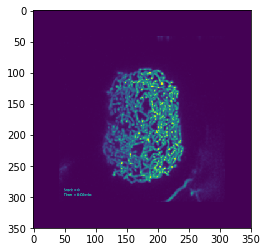

In [13]:
import matplotlib.pyplot as plt
plt.imshow(vid[0,:,:,0])
plt.show()

## Cell Division

- anaphase $\rightarrow$ concentration $\rightarrow$ cytokinesis $\rightarrow$ strethcing $\rightarrow$ complete

In [19]:
movieset[movieset.index == '12212017_dual_decon_c6.tif']

,concentration at division furrow,stretching,thinning before fission,spindle length (pixel),start anaphase,start concentration,start cytokinesis,start stretching,complete division,daughter nuclear area 1,...,daughter nuclear intensity variance,daughter mitochondrial area 1,daughter mitochonrial area 2,daughter mitochondrial intensity 1,daughter mitochondrial intensity 2,daughter mitochondrial area variance,daughter mitochondrial intensity variance,notes,coverage of duration,total recorded frame number
FileName,,,,,,,,,,,,,,,,,,,,,
